# Case study #03 - Data Analysis using Correlation and Regression


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
sales = pd.read_csv("add_sales_data_2018.csv")
sales

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [67]:
sales.tail(5)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [68]:
sales.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

Primary Analysis - The given data shows the amount of money spend by five different advertising companies over the time period 2017-2018.And the profit attained over the same period. There are total 205 rows and 6 columns(money spend by five advertising companies and profit gained).  

Q1.Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [69]:
Acompany1 = sales[['Date','Add1(in Thousands)','Profit(in Thousands)']]
Acompany1

,Date,Add1(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,4093.065
1,2018-10-05,217.00,4042.448
2,2018-10-04,223.50,4213.819
3,2018-10-03,230.00,4391.665
4,2018-10-01,234.55,4350.683
...,...,...,...
200,2017-12-14,288.00,5374.105
201,2017-12-13,290.00,5439.655
202,2017-12-12,298.60,5545.013
203,2017-12-11,290.00,5565.444


In [70]:
Acompany1.describe()

,Add1(in Thousands),Profit(in Thousands)
count,205.000000,205.000000
mean,267.577561,5059.630234
std,26.219588,486.910414
min,208.000000,4042.448000
25%,244.000000,4617.695000
50%,269.700000,5088.455000
75%,284.400000,5387.438000
max,327.700000,6137.800000


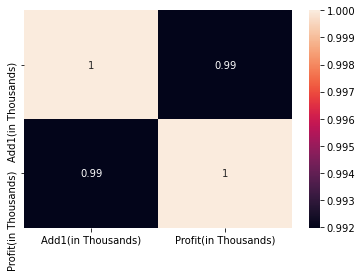

In [71]:
corrmatrix = Acompany1.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

We can make this analysis with the help of single correlation matrix that will analyse correlation between each of these five advertising companies and the profit. The analys is given below.

<AxesSubplot:>

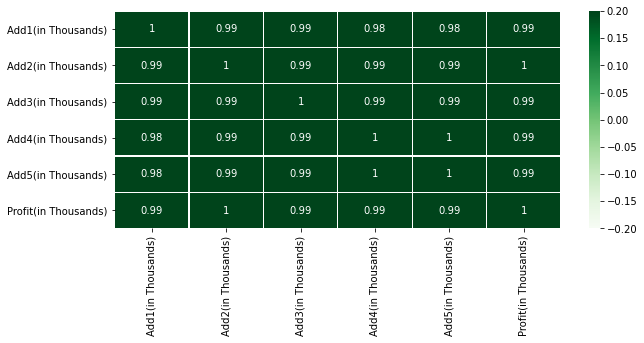

In [72]:
co_matrix=sales.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(co_matrix,vmin=-.2,vmax=.2,annot=True,linewidth=0.2,cmap='Greens')

Insight - The money spend by all five avertising companies are highly positively correlated with the profit. However there exist a perfect positive correlation beween Add2 and profit.

Q2. Building a regression model to predict the profit from the given data.

In [73]:
sales.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

The regression model is to predict the profit so the target(depended variable) is profit and there are five independed variables. And the'date' is not required here we need to drop that column also. 

In [95]:
y = sales['Profit(in Thousands)']
x = sales.drop(['Date','Profit(in Thousands)'],axis =1)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [97]:
from sklearn import linear_model

Creating an instance of the model

In [98]:
lr = linear_model.LinearRegression()

Data fitting

In [99]:
model = lr.fit(x_train,y_train)

In [100]:
predictions = model.predict(x_test)

In [80]:
print(y_test)


15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [101]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


We can see that both are same. Still we can go for mean squared error to check the error.The below explains all.

In [82]:
from sklearn.metrics import mean_squared_error


In [102]:
print("MSE is", mean_squared_error(y_test,predictions))

MSE is 8.11273293080854e-25


This is almost zero which means we have created the model perfectly and test for samples successfully.

In [103]:
x.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


Insights - We have given a data sample which consists 205 rows and 7 columns. In our model the target(depended) variable is Profit. And there are five independed variables. Those the amounts apent by five advertising companies. In this second part we have created a recurssion model. Out of 205 data samples 75% of data is choses for creating the model and with the remaining 25% we have checked the accuracy of our model. And it is true our model has very less mean squared error by checking with test datas.  

Q3. Prediction with the given values

In [107]:
make_prediction = [[290,312,309,298,320]]
model.predict(make_prediction).item()

5820.0599999999995

The profit generated by the company is 5820.060